In [27]:
import cuml
# GPU acceleration for scikit learn (Makes machine learning much faster)
%load_ext cuml.accel

The cuml.accel extension is already loaded. To reload it, use:
  %reload_ext cuml.accel


In [28]:
%env NX_CUGRAPH_AUTOCONFIG=True
import networkx as nx

env: NX_CUGRAPH_AUTOCONFIG=True


In [29]:
# Parameters
D = 10  # Travel time for required arcs
S = 5   # Normal service time
Z = 12  # Zigzag service time

# Optional arc travel times (dashed lines)
optional_arc_times = {
    (0, 4): 10,
    (4, 1): 8,
    (2, 1): 5,
    (4,0): 12
}

# Nodes and depot
nodes = [0, 1, 2, 3, 4]
depot = 0

# Graph definition
graph = {
    "nodes": nodes,
    "depot": depot,
    "edges": {}
}

# Add required arcs (solid lines)
for i in range(len(nodes)):
    next_node = (i + 1) % len(nodes)
    graph["edges"][(i, next_node)] = {
        "travel_time": D,
        "service_time_normal": S,
        "service_time_zigzag": Z,
        "required": True
    }
    graph["edges"][(next_node, i)] = {
        "travel_time": D,
        "service_time_normal": S,
        "service_time_zigzag": Z,
        "required": True
    }

# Add non-required nodes
extra_nodes = [5, 6]
graph["nodes"].extend(extra_nodes)

# Add non-required arcs (increasing complexity, not shortest paths)
graph["edges"][(1, 5)] = {
    "travel_time": 20,
    "required": False
}
graph["edges"][(5, 6)] = {
    "travel_time": 25,
    "required": False
}
graph["edges"][(6, 2)] = {
    "travel_time": 30,
    "required": False
}

    
# Add optional arcs (dashed lines)
for (u, v), travel_time in optional_arc_times.items():
    graph["edges"][(u, v)] = {
        "travel_time": travel_time,
        "required": False
    }

# Output the graph
display(graph)


{'nodes': [0, 1, 2, 3, 4, 5, 6],
 'depot': 0,
 'edges': {(0, 1): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (1, 0): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (1, 2): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (2, 1): {'travel_time': 5, 'required': False},
  (2, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 2): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 4): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (4, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (4, 0): {'travel_time': 12, 'required': False},
  (0, 4): {'travel_time': 10, 'required': False},
  (1, 5): {'travel_

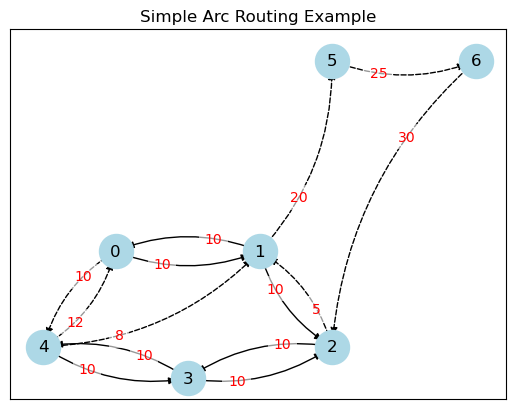

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph):
    G = nx.MultiDiGraph()

    # Add nodes
    for node in graph["nodes"]:
        G.add_node(node)
    
    # Add edges
    for (u, v), attrs in graph["edges"].items():
        label = attrs.get("travel_time", "")
        G.add_edge(u, v, label=label, **attrs)

    # Layout
    pos = {0: (-0.5, 2), 1: (0.5, 2), 
           2: (1, 0.5), 3: (0, 0), 4: (-1, 0.5),
          5: (1, 5), 6: (2, 5)}

    # Draw nodes and labels
    nx.draw_networkx_nodes(G, pos, node_size=600, node_color='lightblue')
    nx.draw_networkx_labels(G, pos)

    # Draw edges with separate styles
    for u, v, k, data in G.edges(keys=True, data=True):
        edge_style = 'solid' if data['required'] else 'dashed'
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], style=edge_style,
                                 connectionstyle=f"arc3, rad={(0.2 if k == 0 else -0.2)}")


    # Draw edge labels with adjusted positions
    for u, v, k, data in G.edges(keys=True, data=True):
        label_pos = 0.2 if k == 0 else -0.2
        edge_label = {(u, v): data['label']}
        nx.draw_networkx_edge_labels(G, pos,
                                      edge_labels=edge_label,
                                      font_color='red',
                                      label_pos=0.3,
                                      rotate=False,
                                      bbox=dict(facecolor='white', edgecolor='none', alpha=0.6),
                                      connectionstyle=f"arc3,rad={label_pos}")

    plt.title("Simple Arc Routing Example")
    plt.show()

# Call the function
visualize_graph(graph)


In [31]:
graph

{'nodes': [0, 1, 2, 3, 4, 5, 6],
 'depot': 0,
 'edges': {(0, 1): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (1, 0): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (1, 2): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (2, 1): {'travel_time': 5, 'required': False},
  (2, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 2): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 4): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (4, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (4, 0): {'travel_time': 12, 'required': False},
  (0, 4): {'travel_time': 10, 'required': False},
  (1, 5): {'travel_

In [32]:
def find_required_nodes(graph, debug=False):
    """
    Identify all nodes involved in 'required' edges, including the depot.

    Parameters:
    - graph (dict): A dictionary with keys 'nodes', 'edges', and 'depot'.
                    Each edge has attributes like 'travel_time' and 'required'.
    - debug (bool): If True, prints step-by-step debug info for understanding.

    Returns:
    - List[int]: List of nodes that are required (including depot).
    """

    # initialize set for required nodes
    required_nodes = set()

    # always include depot
    depot = graph["depot"]
    required_nodes.add(depot)
    if debug: print(f"Depot node added: {depot}")

    for (u, v), attrs in graph["edges"].items():
        if attrs.get("required", False):
            required_nodes.add(u)
            required_nodes.add(v)
            if debug: print(f"Required edge found: ({u} -> {v}), adding nodes {u} and {v}")
        else:
            if debug: print(f"Non-required edge: ({u} -> {v}), ignored")

    result = list(required_nodes)
    if debug: print(f"Final required nodes list: {result}")

    return result

# # Usage example:
required_nodes = find_required_nodes(graph, True)
print(required_nodes)

# Depot node added: 0
# Required edge found: (0 -> 1), adding nodes 0 and 1
# Required edge found: (1 -> 0), adding nodes 1 and 0
# Required edge found: (1 -> 2), adding nodes 1 and 2
# Non-required edge: (2 -> 1), ignored
# Required edge found: (2 -> 3), adding nodes 2 and 3
# Required edge found: (3 -> 2), adding nodes 3 and 2
# Required edge found: (3 -> 4), adding nodes 3 and 4
# Required edge found: (4 -> 3), adding nodes 4 and 3
# Non-required edge: (4 -> 0), ignored
# Non-required edge: (0 -> 4), ignored
# Non-required edge: (1 -> 5), ignored
# Non-required edge: (5 -> 6), ignored
# Non-required edge: (6 -> 2), ignored
# Non-required edge: (4 -> 1), ignored
# Final required nodes list: [0, 1, 2, 3, 4]
# [0, 1, 2, 3, 4]


Depot node added: 0
Required edge found: (0 -> 1), adding nodes 0 and 1
Required edge found: (1 -> 0), adding nodes 1 and 0
Required edge found: (1 -> 2), adding nodes 1 and 2
Non-required edge: (2 -> 1), ignored
Required edge found: (2 -> 3), adding nodes 2 and 3
Required edge found: (3 -> 2), adding nodes 3 and 2
Required edge found: (3 -> 4), adding nodes 3 and 4
Required edge found: (4 -> 3), adding nodes 4 and 3
Non-required edge: (4 -> 0), ignored
Non-required edge: (0 -> 4), ignored
Non-required edge: (1 -> 5), ignored
Non-required edge: (5 -> 6), ignored
Non-required edge: (6 -> 2), ignored
Non-required edge: (4 -> 1), ignored
Final required nodes list: [0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [33]:
# def add_shortest_paths_between_required_nodes(graph_dict, required_nodes, debug=False):
#     """
#     Add edges between required nodes using shortest path travel times.

#     Parameters:
#     - graph_dict (dict): Dictionary with keys 'nodes', 'edges', and 'depot'.
#     - required_nodes (List[int]): List of required nodes (including depot).
#     - debug (bool): If True, prints each edge being added.

#     Returns:
#     - dict: New edges dict with shortest path travel times, marked not required.
#     """

#     # Create NetworkX graph
#     nx_graph = nx.DiGraph()  # or nx.Graph() if undirected

#     # Add nodes
#     nx_graph.add_nodes_from(graph_dict["nodes"])

#     # Add edges with weights
#     for (u, v), attrs in graph_dict["edges"].items():
#         weight = attrs.get("travel_time", 1)  # default weight
#         nx_graph.add_edge(u, v, weight=weight)

#     new_edges = {}

#     # Compute shortest paths
#     lengths = dict(nx.floyd_warshall(nx_graph, weight='weight'))

#     for u in required_nodes:
#         for v in required_nodes:
#             if u != v:
#                 travel_time = lengths[u][v]
#                 new_edges[(u, v)] = {
#                     "travel_time": travel_time
#                 }
#                 if debug:
#                     print(f"Added edge ({u} -> {v}) with travel_time = {travel_time}")

#     if debug:
#         print(f"Total added edges: {len(new_edges)}")

#     return new_edges


# reduced_edges = add_shortest_paths_between_required_nodes(graph, 
#                                                           required_nodes,
#                                                           debug=True)
# reduced_graph = {
#     "nodes": required_nodes,
#     "depot": graph["depot"],
#     "edges": reduced_edges
# }
# reduced_graph

# Added edge (0 -> 1) with travel_time = 10
# Added edge (0 -> 2) with travel_time = 20
# Added edge (0 -> 3) with travel_time = 20
# Added edge (0 -> 4) with travel_time = 10
# Added edge (1 -> 0) with travel_time = 10
# Added edge (1 -> 2) with travel_time = 10
# Added edge (1 -> 3) with travel_time = 20
# Added edge (1 -> 4) with travel_time = 20
# Added edge (2 -> 0) with travel_time = 15
# Added edge (2 -> 1) with travel_time = 5
# Added edge (2 -> 3) with travel_time = 10
# Added edge (2 -> 4) with travel_time = 20
# Added edge (3 -> 0) with travel_time = 22
# Added edge (3 -> 1) with travel_time = 15
# Added edge (3 -> 2) with travel_time = 10
# Added edge (3 -> 4) with travel_time = 10
# Added edge (4 -> 0) with travel_time = 12
# Added edge (4 -> 1) with travel_time = 8
# Added edge (4 -> 2) with travel_time = 18
# Added edge (4 -> 3) with travel_time = 10
# Total added edges: 20
# {'nodes': [0, 1, 2, 3, 4],
#  'depot': 0,
#  'edges': {(0, 1): {'travel_time': 10},
#   (0, 2): {'travel_time': 20},
#   (0, 3): {'travel_time': 20},
#   (0, 4): {'travel_time': 10},
#   (1, 0): {'travel_time': 10},
#   (1, 2): {'travel_time': 10},
#   (1, 3): {'travel_time': 20},
#   (1, 4): {'travel_time': 20},
#   (2, 0): {'travel_time': 15},
#   (2, 1): {'travel_time': 5},
#   (2, 3): {'travel_time': 10},
#   (2, 4): {'travel_time': 20},
#   (3, 0): {'travel_time': 22},
#   (3, 1): {'travel_time': 15},
#   (3, 2): {'travel_time': 10},
#   (3, 4): {'travel_time': 10},
#   (4, 0): {'travel_time': 12},
#   (4, 1): {'travel_time': 8},
#   (4, 2): {'travel_time': 18},
#   (4, 3): {'travel_time': 10}}}

In [34]:
# # Build directed graph for shortest paths
# G = nx.DiGraph()
# G.add_nodes_from(graph["nodes"])
# for (u, v), attrs in graph["edges"].items():
#     G.add_edge(u, v, weight=attrs["travel_time"])


# # Define required nodes (e.g., original required + depot)
# required_nodes = find_required_nodes(graph)

# # Build reduced graph keeping only required nodes
# reduced_graph = {
#     "nodes": required_nodes,
#     "edges": {}
# }

# # Add edges between required nodes with shortest path travel times
# for u in required_nodes:
#     for v in required_nodes:
#         if u != v:
#             reduced_graph["edges"][(u, v)] = {
#                 "travel_time": lengths[u][v]
#             }

# # Output reduced graph
# display(reduced_graph)

In [35]:
# lengths[0][2]

### Notes

- the above method turned the prooblem into a node-based formulation, and removed much of the arc-based advantages, instead need to keep the graph as is without over simplifying
- plan to use a graph reduction and then have a function that connects them "strongly"

In [36]:
graph

{'nodes': [0, 1, 2, 3, 4, 5, 6],
 'depot': 0,
 'edges': {(0, 1): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (1, 0): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (1, 2): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (2, 1): {'travel_time': 5, 'required': False},
  (2, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 2): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 4): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (4, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (4, 0): {'travel_time': 12, 'required': False},
  (0, 4): {'travel_time': 10, 'required': False},
  (1, 5): {'travel_

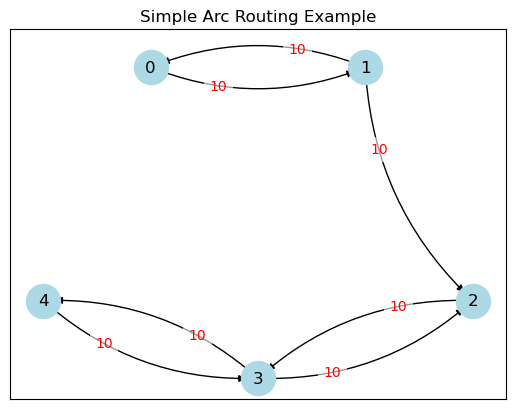

In [37]:
# def reduce_graph_required_only(graph, required_nodes, debug=False):
#     """
#     Reduce the graph to include only required nodes and edges between them that exist in original graph.

#     Args:
#         graph (dict): Original graph with 'nodes', 'edges', and 'depot'.
#         required_nodes (list): List of required nodes.
#         debug (bool): If True, print debug info.

#     Returns:
#         dict: Reduced graph dict with only required nodes and edges between them.
#     """

#     required_set = set(required_nodes)
#     reduced_edges = {}

#     for (u, v), attrs in graph["edges"].items():
#         if u in required_set and v in required_set: # Keep edge only if both endpoints are required nodes
#             reduced_edges[(u, v)] = attrs
#             if debug: print(f"Keeping edge ({u} -> {v})")

#     reduced_graph = {
#         "nodes": required_nodes,
#         "depot": graph["depot"],
#         "edges": reduced_edges
#     }

#     return reduced_graph
def reduce_graph_required_only(graph, required_nodes, debug=False):
    """
    Reduce the graph to include only required nodes and required edges between them.

    Args:
        graph (dict): Original graph with 'nodes', 'edges', and 'depot'.
        required_nodes (list): List of required nodes.
        debug (bool): If True, print debug info.

    Returns:
        dict: Reduced graph dict with only required nodes and required edges.
    """

    # convert to set for faster lookup
    required_set = set(required_nodes)
    reduced_edges = {}

    for (u, v), attrs in graph["edges"].items():
        if (u in required_set and v in required_set) and attrs.get("required", False):
            reduced_edges[(u, v)] = attrs
            if debug: print(f"Keeping required edge ({u} -> {v})")

    reduced_graph = {
        "nodes": required_nodes,
        "depot": graph["depot"],
        "edges": reduced_edges
    }

    return reduced_graph

graph_reduced = reduce_graph_required_only(graph, required_nodes)
visualize_graph(graph_reduced)

### Notes

- This graph needs to be "strongly connected", so it needs a function that connects them strongly more generally. Try removing 1-2 as a required edge to make disjointed

In [38]:
# making sure that we have no strong connections
import copy 
graph_copy = dict(graph)
graph_copy['edges'] = copy.deepcopy(graph['edges']) # dict copies are weird, need to use this way to remove shared reference
graph_copy['edges'][(1, 2)]['required'] = False

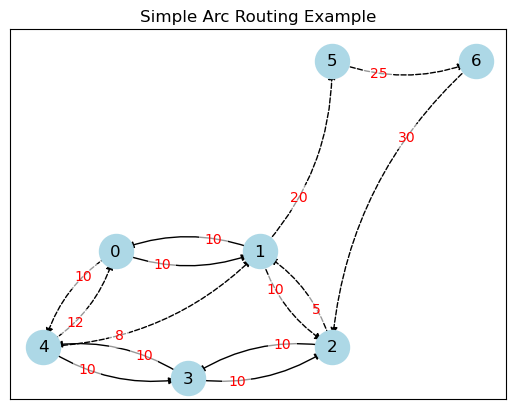

In [39]:
visualize_graph(graph_copy)

In [40]:
required_nodes_copy = find_required_nodes(graph_copy)
print(required_nodes_copy)

[0, 1, 2, 3, 4]


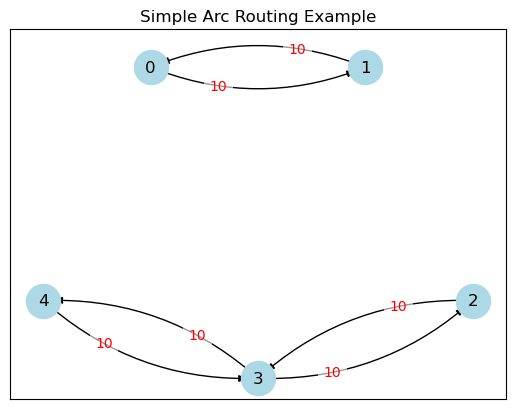

In [41]:
graph_reduced_copy = reduce_graph_required_only(graph_copy, required_nodes_copy)
visualize_graph(graph_reduced_copy)

In [42]:
graph_reduced_copy

{'nodes': [0, 1, 2, 3, 4],
 'depot': 0,
 'edges': {(0, 1): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (1, 0): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (2, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 2): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 4): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (4, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True}}}

In [43]:
graph_copy

{'nodes': [0, 1, 2, 3, 4, 5, 6],
 'depot': 0,
 'edges': {(0, 1): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (1, 0): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (1, 2): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': False},
  (2, 1): {'travel_time': 5, 'required': False},
  (2, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 2): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 4): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (4, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (4, 0): {'travel_time': 12, 'required': False},
  (0, 4): {'travel_time': 10, 'required': False},
  (1, 5): {'travel

In [44]:
import networkx as nx

### Still learning from this code

# Build original graph
G_orig = nx.DiGraph()
G_orig.add_nodes_from(graph_copy['nodes'])
G_orig.add_edges_from([(u, v, d) for (u, v), d in graph_copy['edges'].items()])

# Build reduced graph
G_reduced = nx.DiGraph()
G_reduced.add_nodes_from(graph_reduced_copy['nodes'])
G_reduced.add_edges_from([(u, v, d) for (u, v), d in graph_reduced_copy['edges'].items()])

# Find strongly connected components of reduced graph
sccs = list(nx.strongly_connected_components(G_reduced))

# Build condensation graph of reduced graph based on SCCs
cond_graph = nx.condensation(G_reduced, sccs)

# Precompute all shortest path lengths in original graph (weight = travel_time)
sp_lengths = dict(nx.all_pairs_dijkstra_path_length(G_orig, weight='travel_time'))

# For each pair of condensation nodes (SCCs), check missing edges and add shortest path edges
new_edges = {}

## In particular learning from this section here!!

for u in cond_graph.nodes:
    for v in cond_graph.nodes:
        if u != v and not cond_graph.has_edge(u, v):
            scc_from = sccs[u]
            scc_to = sccs[v]
            min_dist = float('inf')
            best_edge = None
            for node_from in scc_from:
                for node_to in scc_to:
                    dist = sp_lengths.get(node_from, {}).get(node_to, float('inf'))
                    if dist < min_dist:
                        min_dist = dist
                        best_edge = (node_from, node_to)
            if best_edge:
                new_edges[best_edge] = {'travel_time': min_dist, 'required': False}

# Merge new edges into reduced graph edges
updated_edges = {**graph_reduced_copy['edges'], **new_edges}

# Create updated graph dict
graph_reconnected = {
    'nodes': graph_reduced_copy['nodes'],
    'depot': graph_reduced_copy['depot'],
    'edges': updated_edges
}

display(graph_reconnected)


{'nodes': [0, 1, 2, 3, 4],
 'depot': 0,
 'edges': {(0, 1): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (1, 0): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (2, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 2): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (3, 4): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (4, 3): {'travel_time': 10,
   'service_time_normal': 5,
   'service_time_zigzag': 12,
   'required': True},
  (0, 4): {'travel_time': 10.0, 'required': False},
  (2, 1): {'travel_time': 5.0, 'required': False}}}

## Example of Condensation Graph
!['test'](slide_condensation_graph.jpg)

In [45]:
updated_edges

{(0, 1): {'travel_time': 10,
  'service_time_normal': 5,
  'service_time_zigzag': 12,
  'required': True},
 (1, 0): {'travel_time': 10,
  'service_time_normal': 5,
  'service_time_zigzag': 12,
  'required': True},
 (2, 3): {'travel_time': 10,
  'service_time_normal': 5,
  'service_time_zigzag': 12,
  'required': True},
 (3, 2): {'travel_time': 10,
  'service_time_normal': 5,
  'service_time_zigzag': 12,
  'required': True},
 (3, 4): {'travel_time': 10,
  'service_time_normal': 5,
  'service_time_zigzag': 12,
  'required': True},
 (4, 3): {'travel_time': 10,
  'service_time_normal': 5,
  'service_time_zigzag': 12,
  'required': True},
 (0, 4): {'travel_time': 10.0, 'required': False},
 (2, 1): {'travel_time': 5.0, 'required': False}}

In [46]:
sp_lengths

{0: {0: 0.0, 1: 10.0, 2: 20.0, 3: 20.0, 4: 10.0, 5: 30.0, 6: 55.0},
 1: {0: 10.0, 1: 0.0, 2: 10.0, 3: 20.0, 4: 20.0, 5: 20.0, 6: 45.0},
 2: {0: 15.0, 1: 5.0, 2: 0.0, 3: 10.0, 4: 20.0, 5: 25.0, 6: 50.0},
 3: {0: 22.0, 1: 15.0, 2: 10.0, 3: 0.0, 4: 10.0, 5: 35.0, 6: 60.0},
 4: {0: 12.0, 1: 8.0, 2: 18.0, 3: 10.0, 4: 0.0, 5: 28.0, 6: 53.0},
 5: {0: 70.0, 1: 60.0, 2: 55.0, 3: 65.0, 4: 75.0, 5: 0.0, 6: 25.0},
 6: {0: 45.0, 1: 35.0, 2: 30.0, 3: 40.0, 4: 50.0, 5: 55.0, 6: 0.0}}

In [47]:
sccs

[{0, 1}, {2, 3, 4}]

In [48]:
print("Condensation graph nodes:", cond_graph.nodes())
print("Condensation graph edges:", cond_graph.edges())
print("Condensation graph node mapping:", cond_graph.graph['mapping'])


Condensation graph nodes: [0, 1]
Condensation graph edges: []
Condensation graph node mapping: {0: 0, 1: 0, 2: 1, 3: 1, 4: 1}


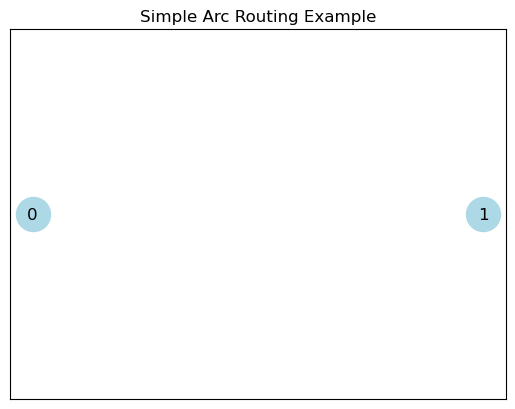

In [49]:
def clean_graph_labels(graph):
    new_edges = {}
    for (u, v), attrs in graph['edges'].items():
        new_attrs = {k: v for k, v in attrs.items() if k != 'label'}        # Copy attrs without 'label' key
        new_edges[(u, v)] = new_attrs
    graph_clean = {
        'nodes': graph['nodes'],
        'depot': graph['depot'],
        'edges': new_edges
    }
    return graph_clean
def cond_graph_to_dict(cond_graph):
    nodes = list(cond_graph.nodes())
    edges = {}
    for u, v, data in cond_graph.edges(data=True):
        # Use a default label or attribute if you want
        edges[(u, v)] = {'travel_time': data.get('weight', 1), 'required': True, 'label': str(data.get('weight', 1))}
    return {
        "nodes": nodes,
        "depot": 0,  # or any SCC node to be depot if relevant
        "edges": edges
    }
    
# Use it on your condensation graph dict
cond_graph_dict_clean = clean_graph_labels(cond_graph_to_dict(cond_graph))

# Now visualize without error
visualize_graph(cond_graph_dict_clean)


In [50]:
cond_graph_dict_clean

{'nodes': [0, 1], 'depot': 0, 'edges': {}}

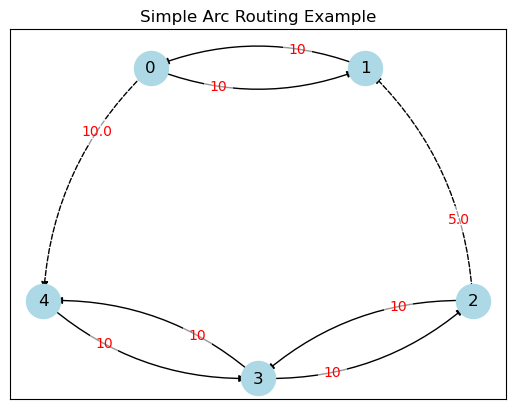

In [51]:
visualize_graph(graph_reconnected)

### Some thoughts on condensation graphs and SCCs with optimization/decomposition and arc-based/node-based routing large scale

1. Turn clusters into single nodes: Group strongly connected components (SCCs) into supernodes using a condensation graph. This simplifies the structure into a DAG (directed acyclic graph), which is easier to work with.
2. Solve routes inside each SCC: Precompute the best subroutes between all possible entrance and exit nodes for each SCC. This handles the complex arc-level details locally.
3. Optimize routes between SCCs: Use the DAG structure to find the best path across the SCCs. Since DAGs don’t have cycles, shortest path methods run fast.
4. Reuse answers: Store the optimal subroutes within each SCC. When solving the whole problem, you can plug these in directly without re-solving them.
5. Hybrid node/arc approach: This blends node-based planning (on the DAG) with arc-based detail (inside each SCC), which helps scale to larger graphs without losing important constraints.